In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
file_path = "/content/drive/My Drive/pr-1,lvl-1,oasis/retail_sales_dataset.csv"

In [13]:
import pandas as pd
df = pd.read_csv(file_path)
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [28]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [26]:
mean_sales = df['Total Amount'].mean()
median_sales = df['Total Amount'].median()
mode_sales = df['Total Amount'].mode()[0]
std_sales = df['Total Amount'].std()

print("Mean Sales:", mean_sales)
print("Median Sales:", median_sales)
print("Mode Sales:", mode_sales)
print("Standard Deviation of Sales:", std_sales)

Mean Sales: 456.0
Median Sales: 135.0
Mode Sales: 50
Standard Deviation of Sales: 559.997631555123


In [34]:
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)
monthly_sales = df['Total Amount'].resample('M').sum()

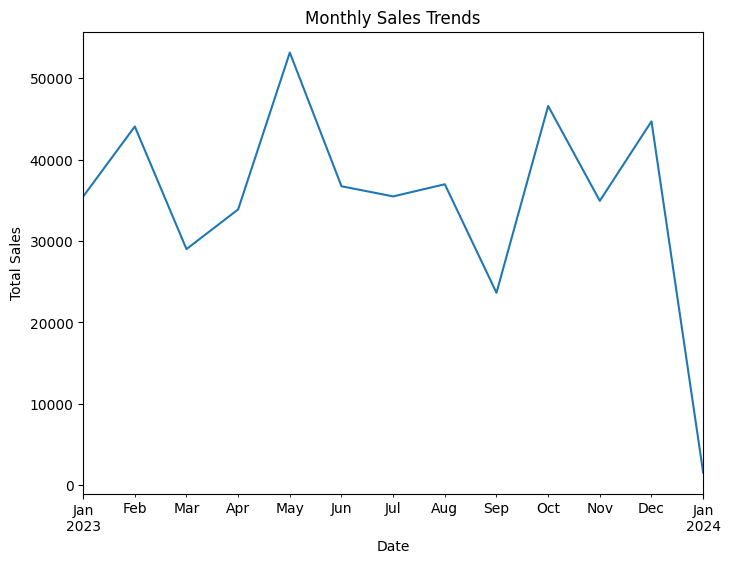

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [40]:
customer_demographics = df.groupby('Gender').size()
print(customer_demographics)


product_sales = df.groupby('Product Category')['Quantity'].sum()
print(product_sales)


Gender
Female    510
Male      490
dtype: int64
Product Category
Beauty         771
Clothing       894
Electronics    849
Name: Quantity, dtype: int64


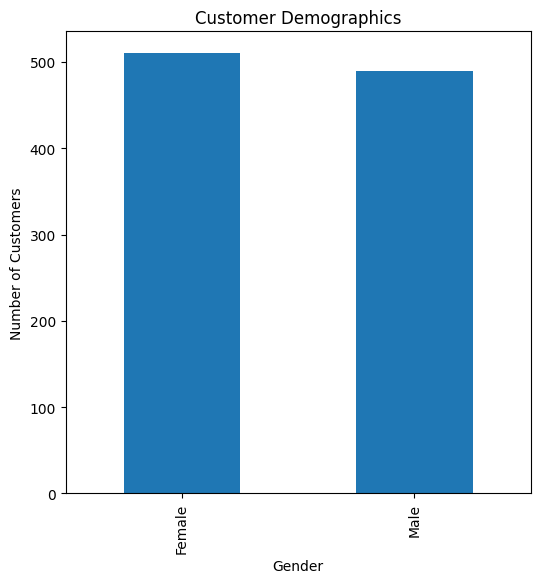

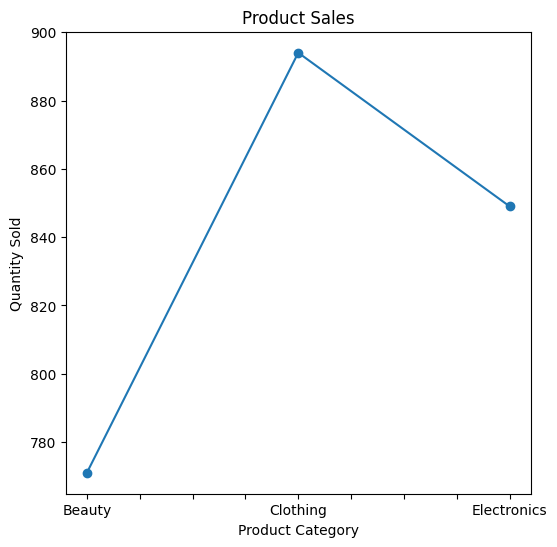

In [44]:
# Bar chart for customer demographics
plt.figure(figsize=(6, 6))
customer_demographics.plot(kind='bar')
plt.title('Customer Demographics')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

# Line plot for product sales
plt.figure(figsize=(6, 6))
product_sales.plot(kind='line', marker='o')
plt.title('Product Sales')
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.show()


In [49]:

customer_demographics = df['Gender'].value_counts()

product_sales = df.groupby('Product Category')['Quantity'].sum()

target_gender = customer_demographics.idxmax()
print("Recommendation 1: Target marketing efforts towards {} customers.".format(target_gender))

top_product_categories = product_sales.nlargest(3).index
print("Recommendation 2: Increase stock for the following product categories: {}.".format(', '.join(top_product_categories)))



Recommendation 1: Target marketing efforts towards Female customers.
Recommendation 2: Increase stock for the following product categories: Clothing, Electronics, Beauty.
